In [3]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [4]:
raw_data = pd.read_csv('data/시도별_화재발생_현황_총괄__20230307153337.csv', encoding = 'cp949', dtype={'시점': str})
raw_data.head()

,시점,행정구역별,건수 (건),사망 (명),부상 (명),재산피해(계) (천원),부동산 (천원),동산 (천원),이재가구수 (가구),이재민수 (명)
0,2019,전국,40103,285,2230,858496234,311283934,547212300,1791,3644
1,2019,서울특별시,5881,37,361,92409010,12331390,80077620,171,318
2,2019,부산광역시,2440,9,121,6242914,2301190,3941724,53,91
3,2019,대구광역시,1323,11,94,7224014,3528639,3695375,31,67
4,2019,인천광역시,1499,14,99,22507439,10715812,11791627,63,115


In [5]:
pop_data = pd.read_csv('data/행정구역_시군구_별__성별_인구수_20230307154458.csv', encoding = 'cp949', dtype={'시점': str})
pop_data.columns = ('시점', '행정구역별', '총인구수 (명)')
pop_data.head()

,시점,행정구역별,총인구수 (명)
0,2022.12,전국,51439038
1,2022.12,서울특별시,9428372
2,2022.12,부산광역시,3317812
3,2022.12,대구광역시,2363691
4,2022.12,인천광역시,2967314


In [6]:
raw_data['행정구역별'].unique()
raw_data['시점'].unique()

array(['2019', '2020', '2021'], dtype=object)

In [7]:
pop_data.drop(pop_data[pop_data['시점'].str.len() > 4].index, inplace = True)

pop_data.head()

,시점,행정구역별,총인구수 (명)
54,2019,전국,51849861
55,2019,서울특별시,9729107
56,2019,부산광역시,3413841
57,2019,대구광역시,2438031
58,2019,인천광역시,2957026


In [8]:
raw_data.head()

,시점,행정구역별,건수 (건),사망 (명),부상 (명),재산피해(계) (천원),부동산 (천원),동산 (천원),이재가구수 (가구),이재민수 (명)
0,2019,전국,40103,285,2230,858496234,311283934,547212300,1791,3644
1,2019,서울특별시,5881,37,361,92409010,12331390,80077620,171,318
2,2019,부산광역시,2440,9,121,6242914,2301190,3941724,53,91
3,2019,대구광역시,1323,11,94,7224014,3528639,3695375,31,67
4,2019,인천광역시,1499,14,99,22507439,10715812,11791627,63,115


In [9]:
merged_data = pop_data.merge(raw_data, on=['시점', '행정구역별'])
merged_data.head()

,시점,행정구역별,총인구수 (명),건수 (건),사망 (명),부상 (명),재산피해(계) (천원),부동산 (천원),동산 (천원),이재가구수 (가구),이재민수 (명)
0,2019,전국,51849861,40103,285,2230,858496234,311283934,547212300,1791,3644
1,2019,서울특별시,9729107,5881,37,361,92409010,12331390,80077620,171,318
2,2019,부산광역시,3413841,2440,9,121,6242914,2301190,3941724,53,91
3,2019,대구광역시,2438031,1323,11,94,7224014,3528639,3695375,31,67
4,2019,인천광역시,2957026,1499,14,99,22507439,10715812,11791627,63,115


In [10]:
pd_data = merged_data[['시점', '행정구역별', '총인구수 (명)', '건수 (건)']]
pd_data.head()

,시점,행정구역별,총인구수 (명),건수 (건)
0,2019,전국,51849861,40103
1,2019,서울특별시,9729107,5881
2,2019,부산광역시,3413841,2440
3,2019,대구광역시,2438031,1323
4,2019,인천광역시,2957026,1499


In [11]:
pd_data['건수/인구수(만명)'] = pd_data['건수 (건)'] / (pd_data['총인구수 (명)'] / 10000)
pd_data.head()

C:\Users\ITPS\AppData\Local\Temp\ipykernel_5576\3716362671.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_data['건수/인구수(만명)'] = pd_data['건수 (건)'] / (pd_data['총인구수 (명)'] / 10000)


,시점,행정구역별,총인구수 (명),건수 (건),건수/인구수(만명)
0,2019,전국,51849861,40103,7.734447
1,2019,서울특별시,9729107,5881,6.044748
2,2019,부산광역시,3413841,2440,7.147374
3,2019,대구광역시,2438031,1323,5.426510
4,2019,인천광역시,2957026,1499,5.069282


In [20]:
pd_data.head()

,시점,행정구역별,총인구수 (명),건수 (건),건수/인구수(만명)
0,2019,전국,51849861,40103,7.734447
1,2019,서울특별시,9729107,5881,6.044748
2,2019,부산광역시,3413841,2440,7.147374
3,2019,대구광역시,2438031,1323,5.426510
4,2019,인천광역시,2957026,1499,5.069282


In [67]:
data_2019 = pd_data[pd_data['시점'] == '2019']
data_2019 = data_2019.rename(columns = {"행정구역별" : "CTP_KOR_NM", '건수/인구수(만명)' : '2019년 건수/인구수(만명)'})
data_2019 = data_2019[['CTP_KOR_NM', '2019년 건수/인구수(만명)']]

data_2020 = pd_data[pd_data['시점'] == '2020']
data_2020 = data_2020.rename(columns = {"행정구역별" : "CTP_KOR_NM", '건수/인구수(만명)' : '2020년 건수/인구수(만명)'})
data_2020 = data_2020[['CTP_KOR_NM', '2020년 건수/인구수(만명)']]

data_2021 = pd_data[pd_data['시점'] == '2021']
data_2021 = data_2021.rename(columns = {"행정구역별" : "CTP_KOR_NM", '건수/인구수(만명)' : '2021년 건수/인구수(만명)'})
data_2021 = data_2021[['CTP_KOR_NM', '2021년 건수/인구수(만명)']]

data_merge = data_2019.merge(data_2020, on=['CTP_KOR_NM'])
data_merge = data_merge.merge(data_2021, on=['CTP_KOR_NM'])
data_merge['화재발생 건수/인구수(만명)'] = (data_merge['2019년 건수/인구수(만명)'] + data_merge['2020년 건수/인구수(만명)'] + data_merge['2021년 건수/인구수(만명)']) / 3
data_merge

,CTP_KOR_NM,2019년 건수/인구수(만명),2020년 건수/인구수(만명),2021년 건수/인구수(만명),화재발생 건수/인구수(만명)
0,전국,7.734447,7.458948,7.023206,7.405534
1,서울특별시,6.044748,5.262469,5.206396,5.504538
2,부산광역시,7.147374,7.367452,6.778336,7.097721
3,대구광역시,5.426510,5.098526,4.984464,5.169833
4,인천광역시,5.069282,4.648590,4.307457,4.675110
5,광주광역시,5.794841,6.082499,5.153956,5.677098
6,대전광역시,5.953067,5.908946,5.481146,5.781053
7,울산광역시,6.419754,8.010444,7.150550,7.193583
8,세종특별자치시,5.608163,5.704955,4.974522,5.429213
9,경기도,7.115738,6.643324,6.021916,6.593659


In [69]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = 'd2coding'
kr_sido = gpd.read_file('data/TL_SCCO_CTPRVN', 
                        encoding="cp949")
kr_sido

,CTPRVN_CD,CTP_ENG_NM,CTP_KOR_NM,geometry
0,11,Seoul,서울특별시,"POLYGON ((966987.226 1941110.946, 961574.146 1..."
1,26,Busan,부산광역시,"MULTIPOLYGON (((1138209.365 1673609.179, 11381..."
2,27,Daegu,대구광역시,"POLYGON ((1107819.047 1781088.551, 1112278.678..."
3,28,Incheon,인천광역시,"MULTIPOLYGON (((909743.413 1946023.117, 909736..."
4,29,Gwangju,광주광역시,"POLYGON ((932712.687 1696168.692, 935873.826 1..."
5,30,Daejeon,대전광역시,"POLYGON ((990703.983 1832673.400, 990974.727 1..."
6,31,Ulsan,울산광역시,"MULTIPOLYGON (((1167949.952 1710285.043, 11679..."
7,36,Sejong-si,세종특별자치시,"POLYGON ((971235.936 1844386.985, 969224.585 1..."
8,41,Gyeonggi-do,경기도,"MULTIPOLYGON (((931607.470 1894480.382, 931653..."
9,42,Gangwon-do,강원도,"MULTIPOLYGON (((1165648.417 1909008.805, 11656..."


In [70]:
merged_data = kr_sido.merge(data_merge, on=['CTP_KOR_NM'])
merged_data

,CTPRVN_CD,CTP_ENG_NM,CTP_KOR_NM,geometry,2019년 건수/인구수(만명),2020년 건수/인구수(만명),2021년 건수/인구수(만명),화재발생 건수/인구수(만명)
0,11,Seoul,서울특별시,"POLYGON ((966987.226 1941110.946, 961574.146 1...",6.044748,5.262469,5.206396,5.504538
1,26,Busan,부산광역시,"MULTIPOLYGON (((1138209.365 1673609.179, 11381...",7.147374,7.367452,6.778336,7.097721
2,27,Daegu,대구광역시,"POLYGON ((1107819.047 1781088.551, 1112278.678...",5.426510,5.098526,4.984464,5.169833
3,28,Incheon,인천광역시,"MULTIPOLYGON (((909743.413 1946023.117, 909736...",5.069282,4.648590,4.307457,4.675110
4,29,Gwangju,광주광역시,"POLYGON ((932712.687 1696168.692, 935873.826 1...",5.794841,6.082499,5.153956,5.677098
5,30,Daejeon,대전광역시,"POLYGON ((990703.983 1832673.400, 990974.727 1...",5.953067,5.908946,5.481146,5.781053
6,31,Ulsan,울산광역시,"MULTIPOLYGON (((1167949.952 1710285.043, 11679...",6.419754,8.010444,7.150550,7.193583
7,36,Sejong-si,세종특별자치시,"POLYGON ((971235.936 1844386.985, 969224.585 1...",5.608163,5.704955,4.974522,5.429213
8,41,Gyeonggi-do,경기도,"MULTIPOLYGON (((931607.470 1894480.382, 931653...",7.115738,6.643324,6.021916,6.593659
9,42,Gangwon-do,강원도,"MULTIPOLYGON (((1165648.417 1909008.805, 11656...",12.799205,11.971429,11.569771,12.113468


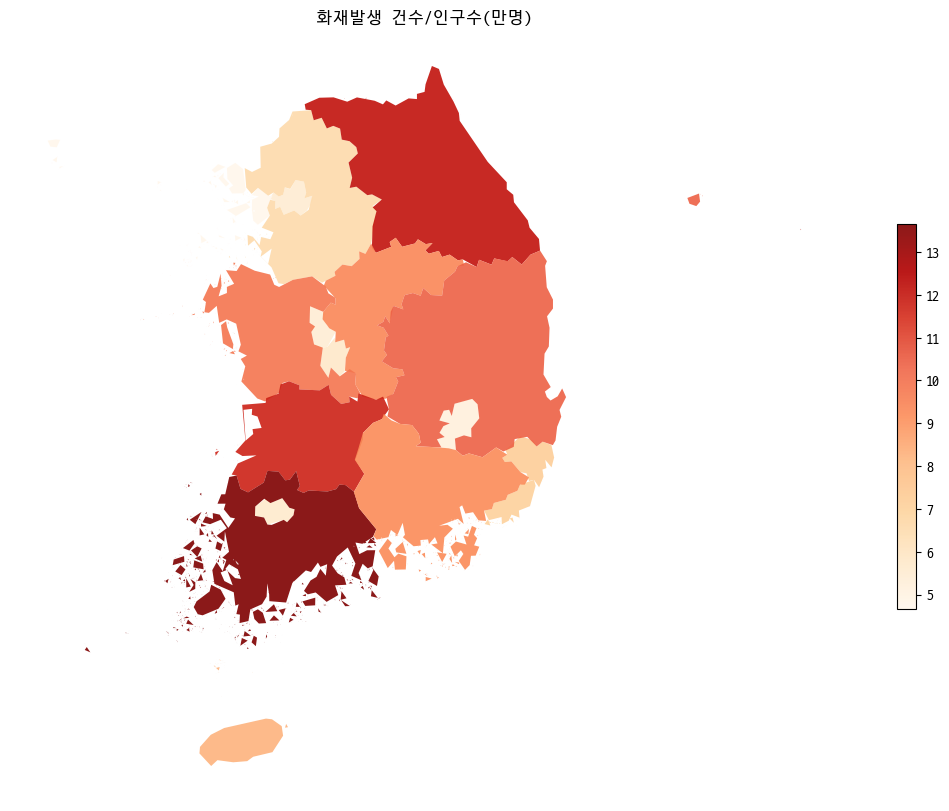

In [71]:
fig, ax = plt.subplots(ncols=1, sharey=True, figsize=(15,10)) 
merged_data.plot(ax=ax, column="화재발생 건수/인구수(만명)", cmap="OrRd", legend=False, alpha=0.9)
patch_col = ax.collections[0]
cb = fig.colorbar(patch_col, ax=ax, shrink=0.5)
ax.set_title('화재발생 건수/인구수(만명)')
ax.set_axis_off();